In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import time

from core import qlearning as q
from core import prices as pr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Variation du $\alpha$:

Je trouve les résultats assez aléatoires

Intuition : 

In [9]:
start = time.time()
aggregated_agents = []
for alpha in [0.1,0.2,0.3,0.4,0.5]:
    total_rewards = []

    for loop in range(3):
        print("Loop:", loop, "alpha:", alpha)
        agents = [q.Agent(alpha=alpha) for _ in range(2)]
        env = q.Env()

        temps = []
        rewards = []
        epsilon = []
        prices = []

        # Initialisation des prix p0 (on va le faire directement dans chaque agent)
        for agent in agents:
            agent.p = np.random.choice(agent.A)

        # Initialisation de l'état
        s_t = env([agent.p for agent in agents])[1]
        for agent in agents:
            agent.s_t = s_t

        s_ind = agents[0].find_index(agents[0].s_t)
        for agent in agents:
            agent.s_ind = s_ind

        # Phase itérative
        for t in range(10**6):
            # Actions et état t+1
            for agent in agents:
                agent.a_ind = agent.get_next_action()

            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            for agent in agents:
                agent.s_t1 = s_t1

            s_ind1 = agents[0].find_index(agents[0].s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1

            temps.append(t)
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            epsilon_values = [agent.epsilon for agent in agents]
            epsilon.append(epsilon_values)
            prices.append([agent.p for agent in agents])

            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)

        total_rewards.append(rewards)

    aggregated_agents.append(np.array(total_rewards).mean(axis=0))
end = time.time()

print(aggregated_agents)
print(end-start)

Loop: 0 alpha: 0.1
Loop: 1 alpha: 0.1
Loop: 2 alpha: 0.1
Loop: 0 alpha: 0.2
Loop: 1 alpha: 0.2
Loop: 2 alpha: 0.2
Loop: 0 alpha: 0.3
Loop: 1 alpha: 0.3
Loop: 2 alpha: 0.3
Loop: 0 alpha: 0.4
Loop: 1 alpha: 0.4
Loop: 2 alpha: 0.4
Loop: 0 alpha: 0.5
Loop: 1 alpha: 0.5
Loop: 2 alpha: 0.5
[array([[0.25493393, 0.28902556],
       [0.23401202, 0.28101081],
       [0.27935697, 0.23518098],
       ...,
       [0.29965669, 0.31225591],
       [0.32489925, 0.20982804],
       [0.32701401, 0.28314175]]), array([[0.34153723, 0.23872182],
       [0.35321017, 0.22955484],
       [0.21426521, 0.37489878],
       ...,
       [0.30471108, 0.31575203],
       [0.30217573, 0.32223514],
       [0.30471108, 0.31575203]]), array([[0.26832469, 0.26558316],
       [0.24065   , 0.32043756],
       [0.34022878, 0.24841025],
       ...,
       [0.29916785, 0.30818631],
       [0.29916785, 0.30818631],
       [0.29916785, 0.30818631]]), array([[0.35534825, 0.29883961],
       [0.25259192, 0.27938463],
       [0.34

In [19]:
aggregated_agents[0][:,1]

array([0.28902556, 0.28101081, 0.23518098, ..., 0.31225591, 0.20982804,
       0.28314175])

In [20]:
len(aggregated_agents[graph_num][0])

2

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_6671/871391648.py:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


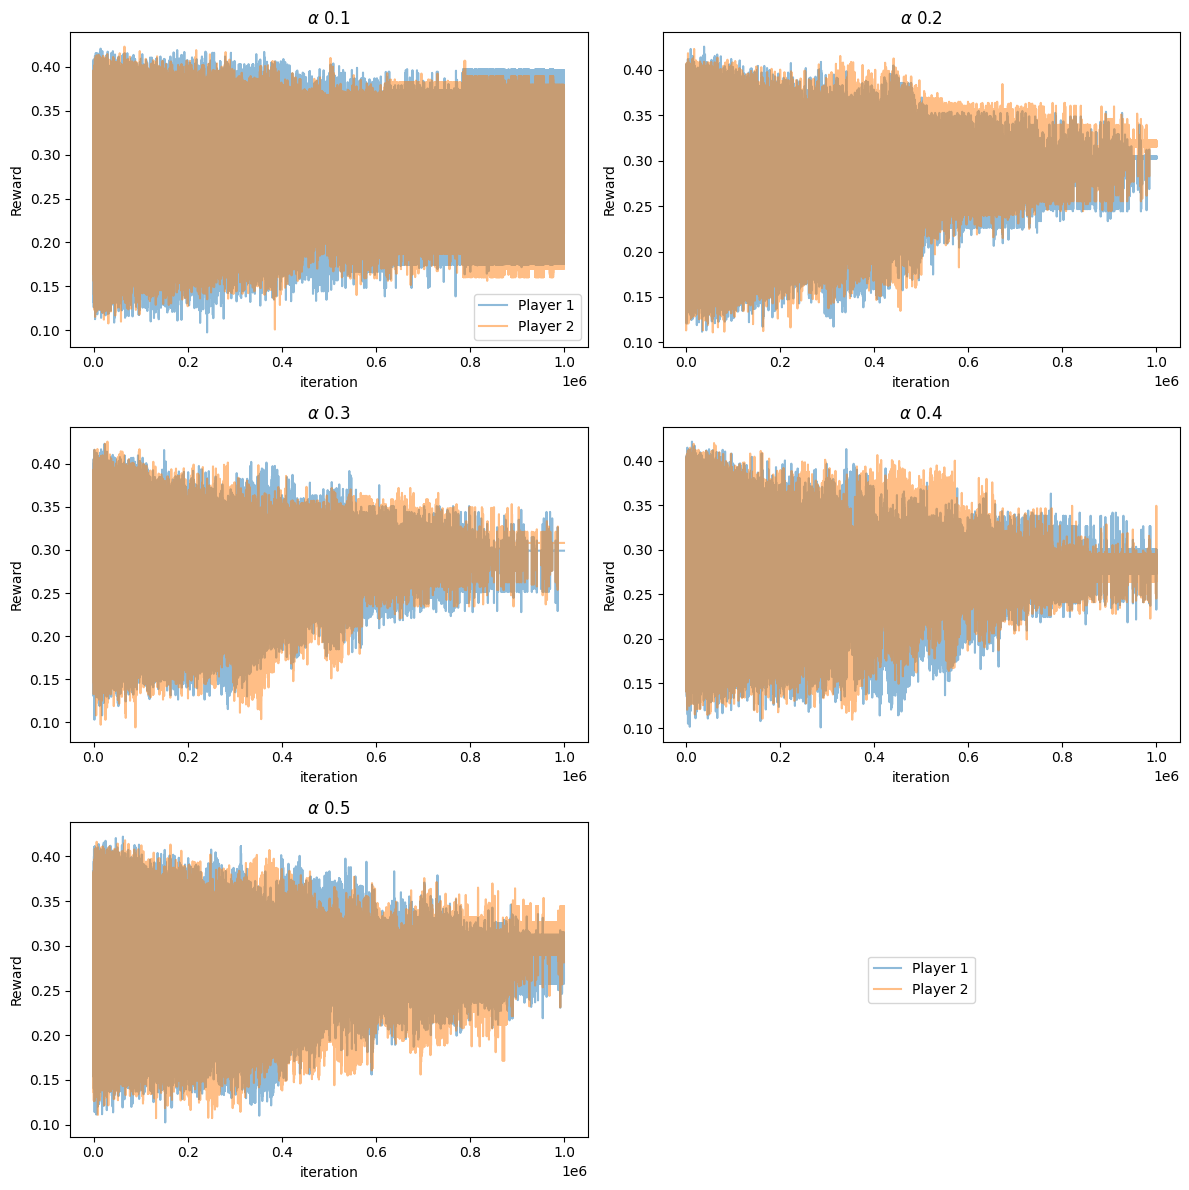

In [28]:
import matplotlib.pyplot as plt
import numpy as np

num_players = 2
num_graphs = len(aggregated_agents)
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\alpha$ {alpha[graph_num]}')
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 5:
    for i in range(num_graphs, 5):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [31]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.59394799 0.52682504]
 [0.70597293 0.84026279]
 [0.66904967 0.74693225]
 [0.56705144 0.50405608]
 [0.54437455 0.75024855]]


[0.56038652 0.77311786 0.70799096 0.53555376 0.64731155]


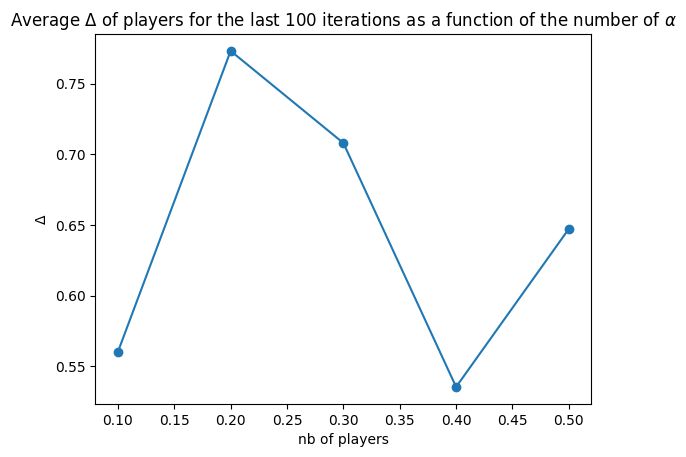

In [32]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot(alpha,av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of the number of $\\alpha$')
plt.show()